# Iris Flower Classification

This notebook outlines a complete, technical roadmap for building an Iris flower classification solution—from data acquisition and exploration to advanced model tuning and deployment. It covers all the learning objectives below:

1. **Data Acquisition & Understanding**
   - Download the Iris dataset
   - Examine dataset structure, data types, and summary statistics

2. **Data Preprocessing**
   - Handle missing values and duplicates
   - Normalize/scale numerical features
   - Encode target labels

3. **Exploratory Data Analysis (EDA)**
   - **Univariate Analysis:** Histograms, boxplots, and summary statistics
   - **Bivariate Analysis:** Scatter plots, correlation matrices, cross-tabulations
   - **Multivariate Analysis:** Pair plots, heatmaps, and PCA for visualization
   - Identify outliers and assess distributions

4. **Feature Engineering**
   - Derive new features if beneficial
   - Apply feature selection methods

5. **Model Selection & Implementation**
   - Implement multiple classification algorithms (e.g., Logistic Regression, SVM, KNN, Decision Trees, Random Forests, Naive Bayes, Ensemble Methods)
   - Understand algorithm assumptions and math
   - Train models using cross-validation or a hold-out method

6. **Model Evaluation**
   - Calculate accuracy, precision, recall, F1-score, and confusion matrix
   - Perform error analysis and compare models

7. **Hyperparameter Tuning & Optimization**
   - Use Grid Search or Randomized Search
   - Analyze bias–variance trade-offs

8. **Advanced Topics (Optional)**
   - Explore ensemble/boosting methods
   - Apply advanced dimensionality reduction techniques (e.g., t-SNE, UMAP)
   - Learn model deployment techniques (saving/loading models)

9. **Project Documentation & Reproducibility**
   - Document steps, code, and results
   - Create comprehensive reports and visualizations

Let's get started!

## 1. Data Acquisition & Understanding

We load the Iris dataset directly from scikit-learn. The dataset contains 150 samples, 4 features (sepal length, sepal width, petal length, petal width) and 3 target classes.

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map numerical target to species names
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Summary

Let's check the dataset structure, data types, and summary statistics.

In [4]:
# Check structure and data types
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 2. Data Preprocessing

We now handle missing values (if any), duplicates, scale numerical features, and encode target labels. (In the Iris dataset there are no missing values, but we include these steps for completeness.)

In [5]:
# Check for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

# For demonstration, if any missing values existed, you could fill them:
# df.fillna(method='ffill', inplace=True)

# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_cols = iris.feature_names
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Encode target labels (already numeric, but ensure consistency)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['species'])

df.head()

Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Number of duplicate rows: 1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,target_encoded
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa,0
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa,0
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa,0
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa,0


## 3. Exploratory Data Analysis (EDA)

### Univariate Analysis

We will visualize the distribution of each numerical feature using histograms and boxplots, and compute summary statistics.

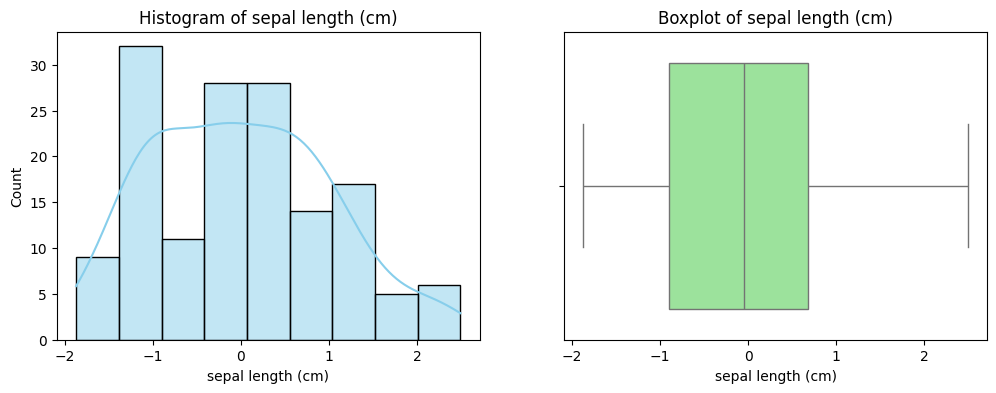

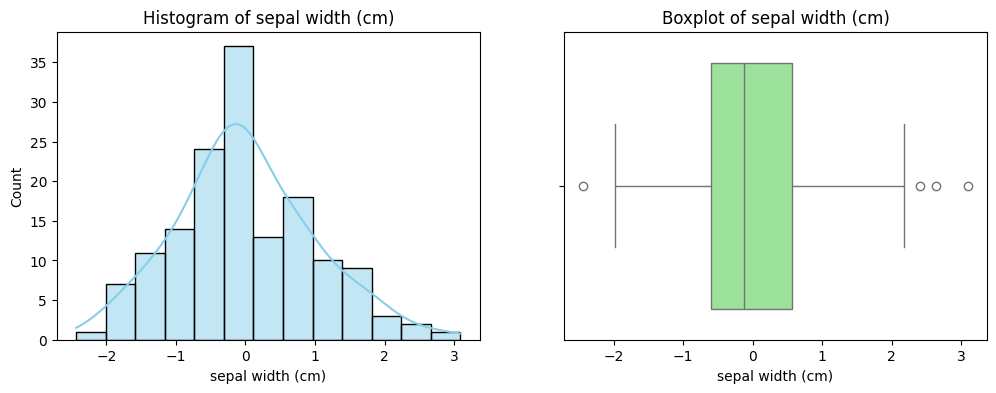

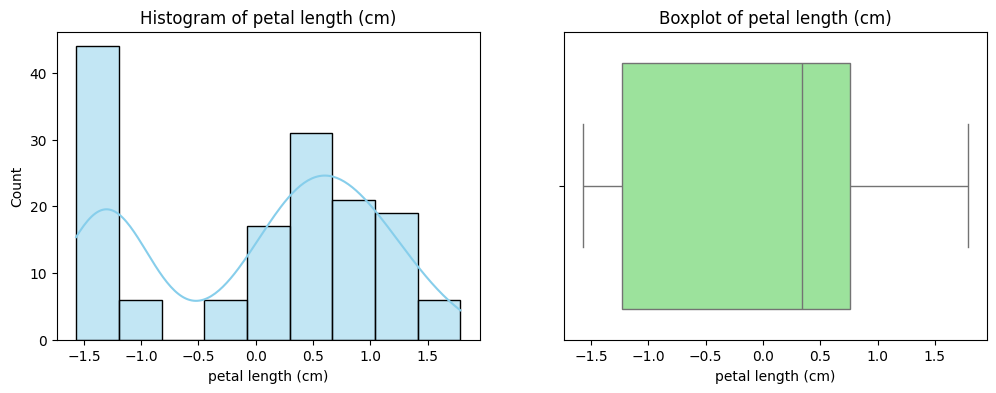

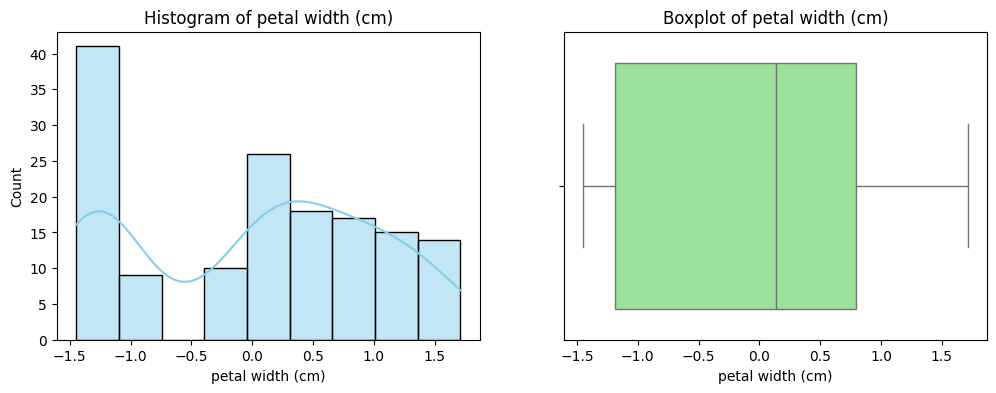

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot histograms and boxplots for each feature
for col in feature_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Print summary statistics
print(df[feature_cols].describe())

### Bivariate Analysis

Next, we explore relationships between features and the target using scatter plots and a correlation matrix.

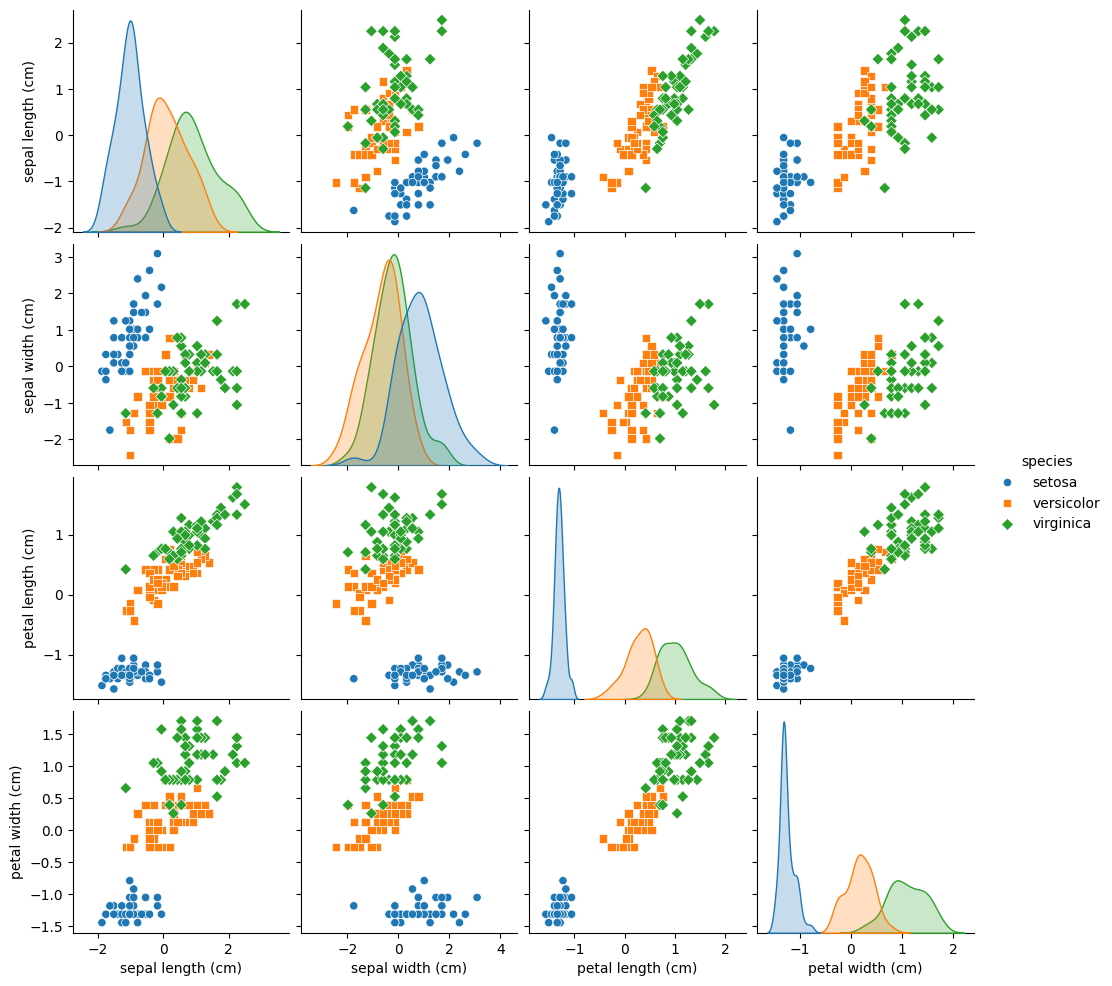

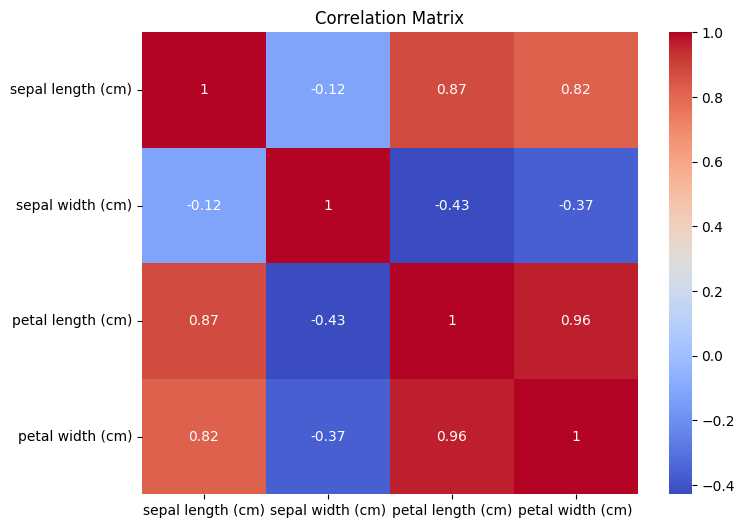

In [9]:
# Scatter plot for each pair of features colored by species
sns.pairplot(df, vars=feature_cols, hue='species', markers=['o', 's', 'D'])
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8,6))
corr = df[feature_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Multivariate Analysis

We use PCA to visualize the data in two dimensions.

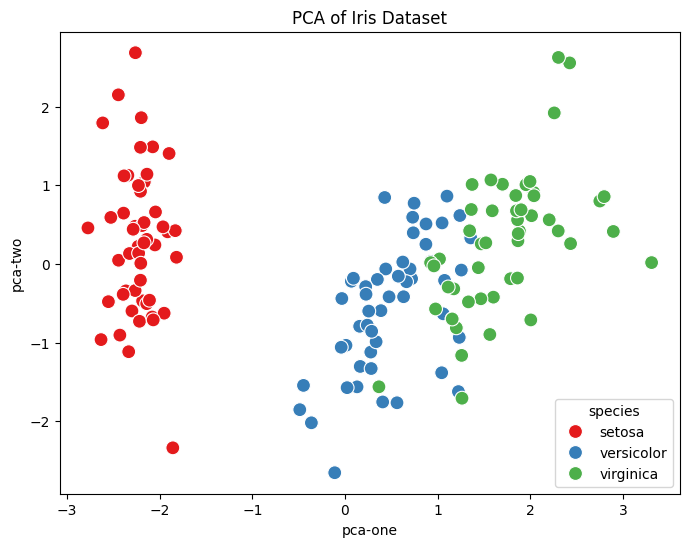

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feature_cols])

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca-one', y='pca-two', hue='species', data=df, palette='Set1', s=100)
plt.title('PCA of Iris Dataset')
plt.show()

## 4. Feature Engineering

For this classic dataset, features are already informative. However, as an example, we can create a new feature (e.g., petal area) and also use feature selection techniques.

In [11]:
# Create a new feature: Petal Area = petal length * petal width
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

print(df[['petal length (cm)', 'petal width (cm)', 'petal_area']].head())

# (Optional) Feature selection example using correlation threshold
threshold = 0.95
corr_matrix = df[feature_cols + ['petal_area']].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Features to drop due to high correlation:", to_drop)

   petal length (cm)  petal width (cm)  petal_area
0          -1.340227         -1.315444    1.762993
1          -1.340227         -1.315444    1.762993
2          -1.397064         -1.315444    1.837760
3          -1.283389         -1.315444    1.688227
4          -1.340227         -1.315444    1.762993
Features to drop due to high correlation: ['petal width (cm)']


## 5. Model Selection & Implementation

We will implement several classification algorithms. For demonstration, we use Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and Naive Bayes.

We first split the dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

# Use all four original features for modeling
X = df[feature_cols]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (105, 4)
Test set shape: (45, 4)


### Implementing Multiple Models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train each model and print accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("---------------------------------------------")

# Ensemble method: Voting Classifier
voting_clf = VotingClassifier(estimators=list(models.items()), voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Voting Classifier Accuracy: {acc_ensemble:.4f}")
print(classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
---------------------------------------------
SVM Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
----------------------

## 6. Model Evaluation

We evaluate our models using accuracy, precision, recall, F1-score and confusion matrices (see above in the model loop).

## 7. Hyperparameter Tuning & Optimization

We use Grid Search to optimize the Random Forest model parameters as an example.

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

# Evaluate the tuned model
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}
Best CV Score: 0.9523809523809523
Tuned Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 8. Advanced Topics (Optional)

### a. Dimensionality Reduction with t-SNE

We apply t-SNE to visualize the dataset in 2D.

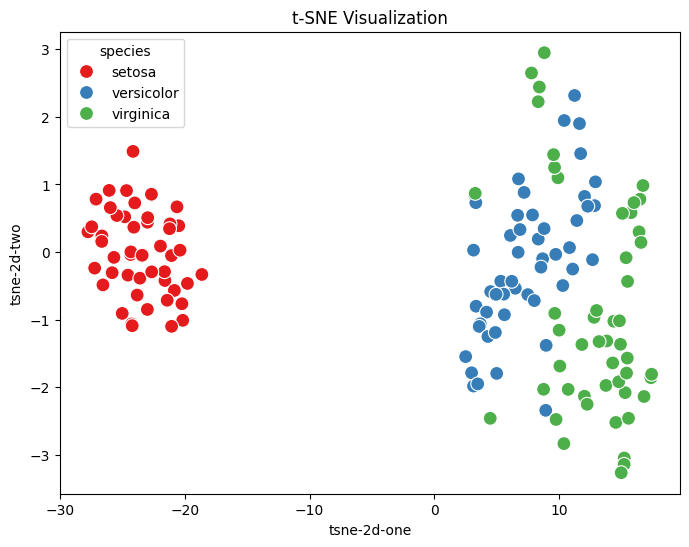

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

df['tsne-2d-one'] = tsne_result[:,0]
df['tsne-2d-two'] = tsne_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='species', data=df, palette='Set1', s=100)
plt.title('t-SNE Visualization')
plt.show()

### b. Model Deployment (Saving and Loading Models)

We save our best model and then load it to make a prediction on new data.

In [17]:
import pickle

# Save the tuned Random Forest model
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Load the model and make a prediction
with open('best_rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)



array([[ 0.31099753, -0.59237301,  0.53540856,  0.00087755]])

In [31]:
# Predict on a sample (using first row of X_test as an example)
sample = np.array(X_test.iloc[3]).reshape(1, -1)

print("Prediction for sample:", loaded_model.predict(sample))

Prediction for sample: [1]


/home/shazad/Project2025/2.Irisflower/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 9. Project Documentation & Reproducibility

Ensure that all code, analysis, and findings are clearly documented. Use markdown cells to explain each step, include visualizations with titles and descriptions, and maintain a reproducible workflow. This notebook itself is an example of complete documentation.

## Conclusion

This notebook demonstrated a complete pipeline for Iris flower classification:

- **Data Acquisition & Understanding**: Loading and examining the dataset
- **Data Preprocessing**: Cleaning, scaling, and encoding data
- **EDA**: Performing univariate, bivariate, and multivariate analyses
- **Feature Engineering**: Creating new features and selecting informative ones
- **Model Implementation**: Training multiple models and evaluating them
- **Hyperparameter Tuning**: Optimizing model parameters using Grid Search
- **Advanced Topics**: Visualizing with t-SNE and saving/loading models for deployment
- **Documentation & Reproducibility**: Clear explanation and documentation at every step

